# Fit - simple external variable

In [1]:
import nexus as nx
import numpy as np

In [2]:
# load example specturm
detuning, intensity = nx.data.Load("spectrum_equality.txt",
                                    x_index = 0,
                                    intensity_index = 1)

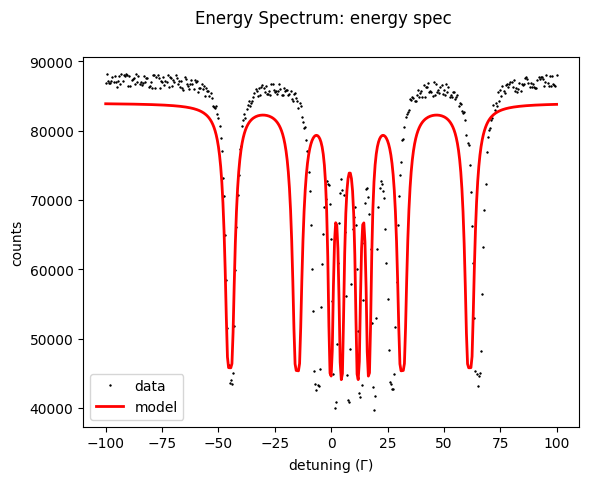

In [3]:
#setup fit parameters
isomer = nx.Var(0.8, min = 0, max = 2, fit = True, id="isomer")

mag_1 = nx.Var(value = 32, min = 25, max = 35, fit = True, id = "mag field 1")

# create a Var used as external fit parameter
# it is not assigned to a *Nexus* object directly
external_fit_mag_2 = nx.Var(value = 8, min = 0, max = 15, fit = True, id = "ext mag field 2")

# a simple functnioal dependence on the external parameter
def external_func_mag2():
    return external_fit_mag_2.value

# assign to sites
site1 = nx.Hyperfine(
    id = "site 1",
    weight = 0.5,
    isomer = isomer,
    magnetic_field = mag_1,
    isotropic = False)

site2 = nx.Hyperfine(
    id = "site 2",
    weight = 0.5,
    isomer = isomer,
    magnetic_field = nx.Var(value = 14, equality = external_func_mag2, id = "mag field 2"),
    isotropic = False)

#create sample
lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 3000)

lay_Fe.material.hyperfine_sites = [site1, site2]

sample = nx.Sample(id = "sample",
                   layers = [lay_Fe],
                   geometry = "f")

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

energy_spec = nx.EnergySpectrum(exp,
                                detuning = detuning,
                                intensity_data = intensity,
                                id = "energy spec")

energy_spec()
energy_spec.Plot()


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 5 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             88182.9 |                0 |      8.81829e+06
    1 |                    ES backgr |             7777.25 |                0 |           777725
    2 |                       isomer |                 0.8 |                0 |                2
    3 |                  mag field 1 |                  32 |               25 |               35
    4 |              ext mag field 2 |                   8 |                0 |               15

Using 1 equality constraint(s) on parameter(s):

  no. |                           id |               value
    0 |                  mag field 2 |                   8

Using 0 inequality constraint(s).


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 6, Initial cost: 9.732088e+04, Final

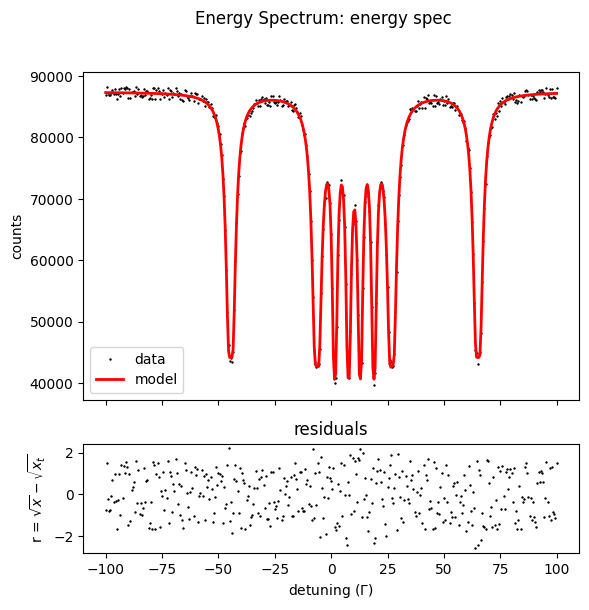

In [4]:
# assign the external_fit_parameter to the Fit object.
fit = nx.Fit([energy_spec],
             external_fit_variables = [external_fit_mag_2])#, external_fit_mag_3])
fit()

energy_spec.Plot()